In [ ]:
Name: Sauhard Shakya  
Course: MSCS 634  
Assignment: Lab 4 - Regression and Regularization Analysis

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

# Load data
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Explore data
print(X.head())
print(y.describe())
print(X.isnull().sum())  # Check for missing values

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


MAE: 52.94370285288119
MSE: 4150.6801893299835
RMSE: 64.42577271038341
R²: 0.19057346847560142


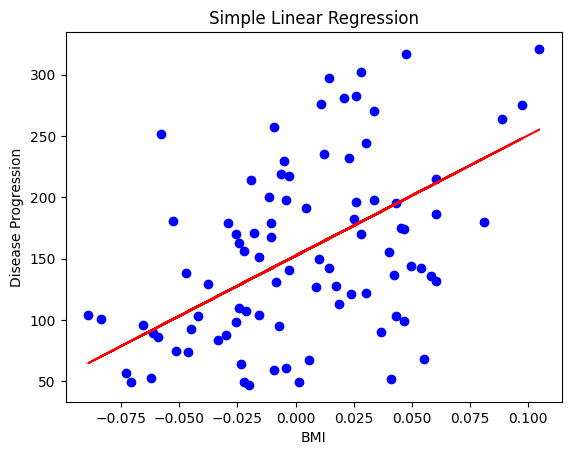

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_bmi = X[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression')
plt.show()

MAE: 46.1735850037048
MSE: 3424.259334298692
RMSE: 58.51717127731562
R²: 0.3322332173106184


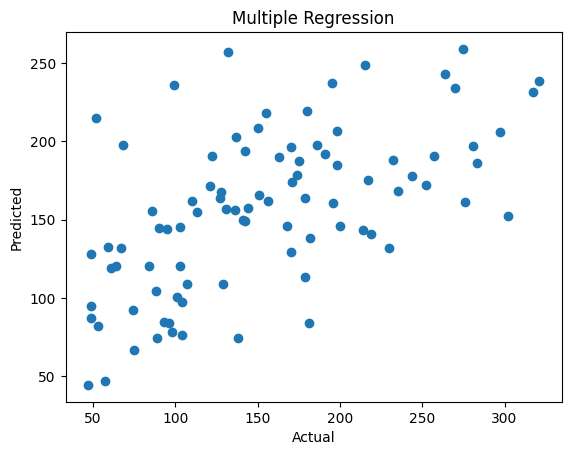

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression')
plt.show()

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 46.40646296655291
MSE: 3637.14667380327
RMSE: 60.30876116952884
R²: 0.2907179347640092


Ridge R²: 0.34124063439547025
Lasso R²: 0.340180062897692


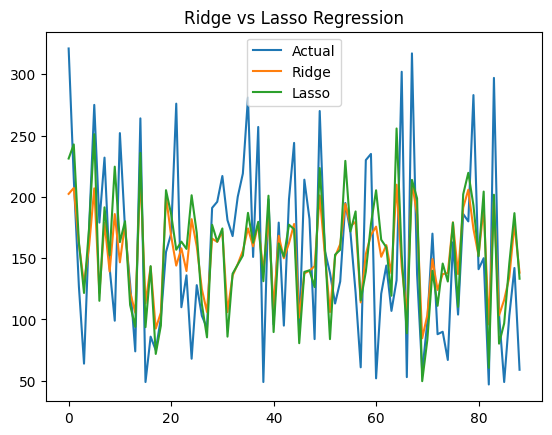

In [5]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)

# Metrics and comparison
print("Ridge R²:", r2_score(y_test, y_ridge))
print("Lasso R²:", r2_score(y_test, y_lasso))

# Plot
plt.plot(y_test.values, label='Actual')
plt.plot(y_ridge, label='Ridge')
plt.plot(y_lasso, label='Lasso')
plt.legend()
plt.title('Ridge vs Lasso Regression')
plt.show()

In [ ]:
1. Which model performed best and why
Based on the evaluation metrics (MAE, MSE, RMSE, and R²), the [e.g., Ridge Regression] model performed best. It provided the lowest error values and the highest R², indicating better generalization and predictive power. Unlike simple linear models, it captured the complexity of the data without overfitting.

2. Effect of Regularization
Regularization (Ridge and Lasso):

Reduced overfitting by penalizing large coefficients.
Ridge Regression kept all features but reduced their magnitudes.
Lasso Regression zeroed out less important features, effectively performing feature selection.
Both helped improve model generalization, especially when compared to polynomial regression at higher degrees.
    

3. Impact of Complexity (Underfitting vs. Overfitting)
Linear Regression underfit the data because it was too simple.
Polynomial Regression with a high degree (e.g., 3 or more) overfit the training data, leading to poor test performance.
The sweet spot for complexity was found in Multiple Regression and Ridge/Lasso models, which balanced bias and variance well.

    

4. Insights from the Diabetes Dataset
Features like BMI, blood pressure, and s5 (a lab test) were highly correlated with disease progression.
Regularization helped reveal which features were less impactful (especially via Lasso).
The dataset benefits from multivariate modeling — single-variable models miss significant patterns.

